[0.00012933242, 0.00032981331, 0.0005118188, 0.0015417294, 0.0023866147]
[0.0023705487, 0.010374969, 0.02343455, 0.032189421, 0.64911437]


,val,lr_step,n_epochs,train_size,base_lr,momentum,weight_decay,gamma,initial acc
192,0.641927,320,10,4096,0.002387,0.9,0.032189,0.1,0.196875
191,0.639063,320,10,4096,0.001542,0.9,0.010375,0.1,0.237500
190,0.637240,320,10,4096,0.001542,0.9,0.002371,0.1,0.171875
189,0.626042,320,10,4096,0.001542,0.9,0.023435,0.1,0.258333
188,0.621875,320,10,4096,0.002387,0.9,0.023435,0.1,0.297656
187,0.615625,320,10,4096,0.001542,0.9,0.032189,0.1,0.250781
186,0.601562,320,10,4096,0.002387,0.9,0.002371,0.1,0.171875
185,0.601042,320,10,4096,0.000512,0.9,0.010375,0.1,0.235417
184,0.600521,320,10,4096,0.000512,0.9,0.023435,0.1,0.235677
183,0.597396,320,10,4096,0.002387,0.9,0.010375,0.1,0.195573


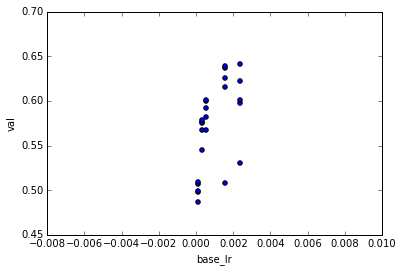

In [109]:
import os
import glob
import sys
import numpy
import math
import json
import re

from pprint import pprint
from pylab import *
%matplotlib inline

import pandas as pd

prefix = 'finetune/search/alex'

data = []
keys = ['val', 'lr_step', 'n_epochs', 'train_size', 'base_lr', 'momentum', 'weight_decay', 'gamma']
pat = re.compile(prefix + '.' + '\.'.join([key + '-([.0-9e\-]+)' for key in keys]) + '.val_acc.npy')
files = sorted(glob.glob(prefix + '*.val_acc.npy'))
for f in files:
    match = pat.match(f)
    if not match:
        print('No match for', f)
        continue
    with open(f) as df:
        acc = numpy.load(df)
    data.append(match.groups() + (acc[0],))
keys.append('initial acc')
df = pd.DataFrame(data=np.array(data, dtype=float32), columns=keys)

#df.sort(columns=['val'], ascending=False)
df = df[df.n_epochs == 10]
df.plot(x='base_lr', y='val', kind='scatter')
print(sorted(set(df.base_lr.tolist())))
print(sorted(set(df.weight_decay.tolist())))
df.sort(columns=['val'], ascending=False)